In [2]:
PATH='C:\\Users\\paper\\knowledge_center\\'
import pandas as pd
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import time

In [10]:
D=pd.read_pickle(PATH+'D.pkl')
D_train, D_test=train_test_split(D, test_size=0.33, random_state=42)

In [3]:
#cutting和supporting为空
D=pd.read_pickle(PATH+'D.pkl').drop(['Cutting','Stabilization','Supporting','Seriflux'],axis=1).sort_values(by='Project')[:31]
D_train, D_test=train_test_split(D, test_size=0.33, random_state=42)

In [2]:
#无target
D=pd.read_pickle(PATH+'D.pkl').drop(['Target'],axis=1).sort_values(by='Project')[:31]
D_train, D_test=train_test_split(D, test_size=0.33, random_state=42)

In [3]:
BNnodes1=[('Propelling','Project'),('Stabilization','Project'),('Grouting','Project'),('Seriflux','Project'),
          ('Geology','Project'),('Segment','Project'),('Shield','Project'),('Tunnel','Project'),
          ('Location','Project'),('Project','Phenomenon'),('Project','Target'),('Cutting','Project'),('Supporting','Project')]

In [4]:
BNnodes2=[('Propelling','Project'),('Grouting','Project'),
          ('Geology','Project'),('Segment','Project'),('Shield','Project'),('Tunnel','Project'),
          ('Location','Project'),('Project','Phenomenon'),('Project','Target')]

In [3]:
BNnodes3=[('Propelling','Project'),('Stabilization','Project'),('Grouting','Project'),('Seriflux','Project'),
          ('Geology','Project'),('Segment','Project'),('Shield','Project'),('Tunnel','Project'),
          ('Location','Project'),('Project','Phenomenon'),('Cutting','Project'),('Supporting','Project')]

In [11]:
state_names=dict()
for i in D.columns.tolist():
    state_names[i]=D[i].unique().tolist()

In [17]:
state_names

{'Phenomenon': ['E0193', 'E0152', 'E0165', 'E0149', 'E0189', 'E0182', 'E0199'],
 'Location': ['E0372', 'E0373', 'E0374', 'E0375', 'NULL'],
 'Tunnel': ['E0029',
  'E0030',
  'E0031',
  'E0032',
  'E0033',
  'NULL',
  'E0034',
  'E0035',
  'E0036',
  'E0037'],
 'Shield': ['NULL', 'E0044', 'E0045', 'E0046'],
 'Segment': ['NULL', 'E0053', 'E0054', 'E0055', 'E0056', 'E0057'],
 'Geology': ['E0065',
  'E0066',
  'E0067',
  'E0068',
  'E0069',
  'E0070',
  'E0071',
  'E0073',
  'E0072'],
 'Propelling': ['NULL', 'E0090', 'E0091', 'E0092', 'E0093'],
 'Cutting': ['NULL'],
 'Seriflux': ['NULL', 'E0095', 'E0096', 'E0097'],
 'Grouting': ['NULL', 'E0102', 'E0103'],
 'Stabilization': ['NULL'],
 'Supporting': ['NULL'],
 'Project': ['E0001',
  'E0002',
  'E0003',
  'E0004',
  'E0005',
  'E0006',
  'E0007',
  'E0008',
  'E0009',
  'E0010']}

In [9]:
start=time.time()
model = BayesianNetwork(BNnodes)
model.fit(D_train[0:3], estimator=MaximumLikelihoodEstimator,state_names=state_names)
end=time.time()
model.save(PATH+'BN_woTarget.bif',filetype='bif')
print('time:',start-end)

time: -21509.1675696373


In [24]:
D_train.shape

(20, 10)

In [25]:
for i in range(4):
    model.fit_update(D_train[(i+1)*4+1:(i+2)*4])
    model.save(PATH+'BN_test'+str(i+2)+'.bif',filetype='bif')
    print("batch",i+1)

batch 1
batch 2
batch 3
batch 4


In [26]:
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of Propelling:
+-------------------+-----------+
| Propelling(NULL)  | 0.4375    |
+-------------------+-----------+
| Propelling(E0090) | 0.0208333 |
+-------------------+-----------+
| Propelling(E0091) | 0.166667  |
+-------------------+-----------+
| Propelling(E0092) | 0.208333  |
+-------------------+-----------+
| Propelling(E0093) | 0.166667  |
+-------------------+-----------+
CPD of Project:
+----------------+--------------------+-----+---------------------+---------------------+
| Geology        | Geology(E0065)     | ... | Geology(E0072)      | Geology(E0072)      |
+----------------+--------------------+-----+---------------------+---------------------+
| Grouting       | Grouting(NULL)     | ... | Grouting(E0103)     | Grouting(E0103)     |
+----------------+--------------------+-----+---------------------+---------------------+
| Location       | Location(E0372)    | ... | Location(NULL)      | Location(NULL)      |
+----------------+--------------------+-----+------

In [22]:
def showBN(model,save=True):
    '''传入BayesianModel对象，调用graphviz绘制结构图，jupyter中可直接显示'''
    from graphviz import Digraph
    node_attr = dict(
     style='filled',
     shape='box',
     align='left',
     fontsize='12',
     ranksep='0.1',
     height='0.2'
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges=model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        #dot.view(cleanup=True)
        dot.render(directory=PATH+'doctest-output', view=True)  
    return dot
showBN(model)    

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [6]:
model= BayesianNetwork.load(PATH+'BN_test5.bif', filetype='bif')

In [10]:
!pip install graphviz

In [28]:
from pgmpy.sampling import GibbsSampling
gibbs_chain = GibbsSampling(model)

G:\anaconda\anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:535: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(


KeyboardInterrupt: 

In [33]:
pred=model.predict(D_test.drop(['Target','Project','Phenomenon'],axis=1))

  0%|          | 0/8 [00:00<?, ?it/s]

In [39]:
pred.to_pickle(PATH+'pred..pkl')

In [4]:
pred=pd.read_pickle(PATH+'pred..pkl')

In [38]:
D_test[['Project','Phenomenon','Target']]

,Project,Phenomenon,Target
48,E0010,E0199,E0270
8,E0006,E0152,E0259
45,E0009,E0182,E0225
41,E0007,E0189,E0254
34,E0004,E0152,E0257
33,E0004,E0152,E0289
12,E0010,E0199,E0225
46,E0009,E0182,E0302
37,E0005,E0149,E0266
1,E0001,E0193,E0253


In [5]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred.Project,D_test.Project))
print(accuracy_score(pred.Phenomenon, D_test.Phenomenon))
print(accuracy_score(pred.Target, D_test.Target))

0.45454545454545453
0.7272727272727273
0.0


In [7]:
posibilities=model.predict_probability(D_test.drop(['Phenomenon'],axis=1))

In [8]:
posibilities

,Phenomenon_E0193,Phenomenon_E0152,Phenomenon_E0165,Phenomenon_E0149,Phenomenon_E0189,Phenomenon_E0182,Phenomenon_E0199
48,0.107143,0.107143,0.107143,0.107143,0.107143,0.107143,0.357143
8,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
45,0.080357,0.080357,0.080357,0.080357,0.080357,0.517857,0.080357
41,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
34,0.085714,0.485714,0.085714,0.085714,0.085714,0.085714,0.085714
33,0.085714,0.485714,0.085714,0.085714,0.085714,0.085714,0.085714
12,0.107143,0.107143,0.107143,0.107143,0.107143,0.107143,0.357143
46,0.080357,0.080357,0.080357,0.080357,0.080357,0.517857,0.080357
37,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.485714,0.085714,0.085714,0.085714,0.085714,0.085714,0.085714


In [9]:
pred.to_pickle(PATH+'possibilities.pkl')

In [7]:
posibilities=model.predict_probability(D_test.drop(['Target','Project','Phenomenon'],axis=1))

In [8]:
posibilities

,Target_E0253,Target_E0242,Target_E0216,Target_E0266,Target_E0282,Target_E0281,Target_E0251,Target_E0224,Target_E0257,Target_E0289,...,Project_E0008,Project_E0009,Project_E0010,Phenomenon_E0193,Phenomenon_E0152,Phenomenon_E0165,Phenomenon_E0149,Phenomenon_E0189,Phenomenon_E0182,Phenomenon_E0199
48,0.022537,0.037537,0.069178,0.022537,0.022537,0.172538,0.041287,0.056288,0.022537,0.022537,...,0.07500,0.07500,0.32500,0.110491,0.185491,0.099241,0.155491,0.155491,0.132054,0.161741
8,0.020050,0.040050,0.082238,0.020050,0.020050,0.220050,0.045050,0.065050,0.020050,0.020050,...,0.10000,0.10000,0.10000,0.111607,0.211607,0.096607,0.171607,0.171607,0.140357,0.096607
45,0.021122,0.032372,0.056102,0.021122,0.021122,0.133622,0.035184,0.155809,0.021122,0.021122,...,0.05625,0.49375,0.05625,0.097935,0.154185,0.089498,0.131685,0.131685,0.305513,0.089498
41,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
34,0.021630,0.033630,0.058943,0.021630,0.021630,0.141630,0.036630,0.128630,0.021630,0.021630,...,0.06000,0.06000,0.06000,0.101250,0.321250,0.092250,0.137250,0.137250,0.118500,0.092250
33,0.021630,0.033630,0.058943,0.021630,0.021630,0.141630,0.036630,0.128630,0.021630,0.021630,...,0.06000,0.06000,0.06000,0.101250,0.321250,0.092250,0.137250,0.137250,0.118500,0.092250
12,0.022537,0.037537,0.069178,0.022537,0.022537,0.172538,0.041287,0.056288,0.022537,0.022537,...,0.07500,0.07500,0.32500,0.110491,0.185491,0.099241,0.155491,0.155491,0.132054,0.161741
46,0.021122,0.032372,0.056102,0.021122,0.021122,0.133622,0.035184,0.155809,0.021122,0.021122,...,0.05625,0.49375,0.05625,0.097935,0.154185,0.089498,0.131685,0.131685,0.305513,0.089498
37,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.021630,0.113630,0.138942,0.021630,0.021630,0.141630,0.036630,0.048630,0.021630,0.021630,...,0.06000,0.06000,0.06000,0.261250,0.161250,0.092250,0.137250,0.137250,0.118500,0.092250


In [10]:
posibilities.to_pickle(PATH+'possibilities_woPhenomenon.pkl')

In [11]:
possibilities_w=model.predict_probability(D_test.drop(['Target','Project'],axis=1))

In [12]:
possibilities_w

,Target_E0253,Target_E0242,Target_E0216,Target_E0266,Target_E0282,Target_E0281,Target_E0251,Target_E0224,Target_E0257,Target_E0289,...,Project_E0001,Project_E0002,Project_E0003,Project_E0004,Project_E0005,Project_E0006,Project_E0007,Project_E0008,Project_E0009,Project_E0010
48,0.029906,0.037855,0.037855,0.029906,0.029906,0.029906,0.042327,0.047171,0.029906,0.029906,...,0.039746,0.000000,0.049683,0.039746,0.0,0.066243,0.0,0.049683,0.037262,0.717637
8,0.014593,0.022694,0.022694,0.014593,0.014593,0.487167,0.027251,0.069994,0.014593,0.014593,...,0.040506,0.472574,0.050633,0.229536,0.0,0.067511,0.0,0.050633,0.037975,0.050633
45,0.023797,0.026953,0.026953,0.023797,0.023797,0.023797,0.028728,0.236184,0.023797,0.023797,...,0.015781,0.000000,0.019727,0.015781,0.0,0.026302,0.0,0.065756,0.836926,0.019727
41,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000
34,0.020282,0.023484,0.023484,0.020282,0.020282,0.207053,0.025285,0.163134,0.020282,0.020282,...,0.016009,0.186770,0.020011,0.695497,0.0,0.026681,0.0,0.020011,0.015008,0.020011
33,0.020282,0.023484,0.023484,0.020282,0.020282,0.207053,0.025285,0.163134,0.020282,0.020282,...,0.016009,0.186770,0.020011,0.695497,0.0,0.026681,0.0,0.020011,0.015008,0.020011
12,0.029906,0.037855,0.037855,0.029906,0.029906,0.029906,0.042327,0.047171,0.029906,0.029906,...,0.039746,0.000000,0.049683,0.039746,0.0,0.066243,0.0,0.049683,0.037262,0.717637
46,0.023797,0.026953,0.026953,0.023797,0.023797,0.023797,0.028728,0.236184,0.023797,0.023797,...,0.015781,0.000000,0.019727,0.015781,0.0,0.026302,0.0,0.065756,0.836926,0.019727
37,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.024940,0.195986,0.195986,0.024940,0.024940,0.024940,0.031092,0.033491,0.024940,0.024940,...,0.855229,0.000000,0.024607,0.019686,0.0,0.032809,0.0,0.024607,0.018455,0.024607


In [13]:
posibilities.to_pickle(PATH+'possibilities_wPhenomenon.pkl')

In [21]:
#数据查看
for i in state_names.keys():
    print(i,len(state_names[i]))

Phenomenon 12
Location 12
Tunnel 16
Shield 10
Segment 13
Geology 26
Propelling 6
Cutting 1
Seriflux 8
Grouting 5
Stabilization 2
Supporting 1
Target 61
Project 28


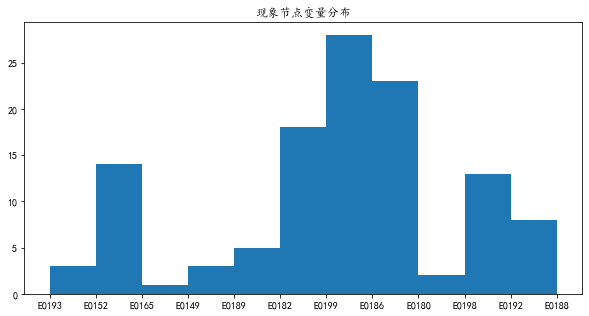

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10.0,5.0)
plt.rcParams['font.sans-serif']=['KaiTi']
plt.title('现象节点变量分布')
plt.hist(D['Phenomenon'],bins=state_names['Phenomenon'])
plt.savefig(PATH+'Phenomenon_hist.png',dpi=300,bbox_inches='tight')
plt.show()

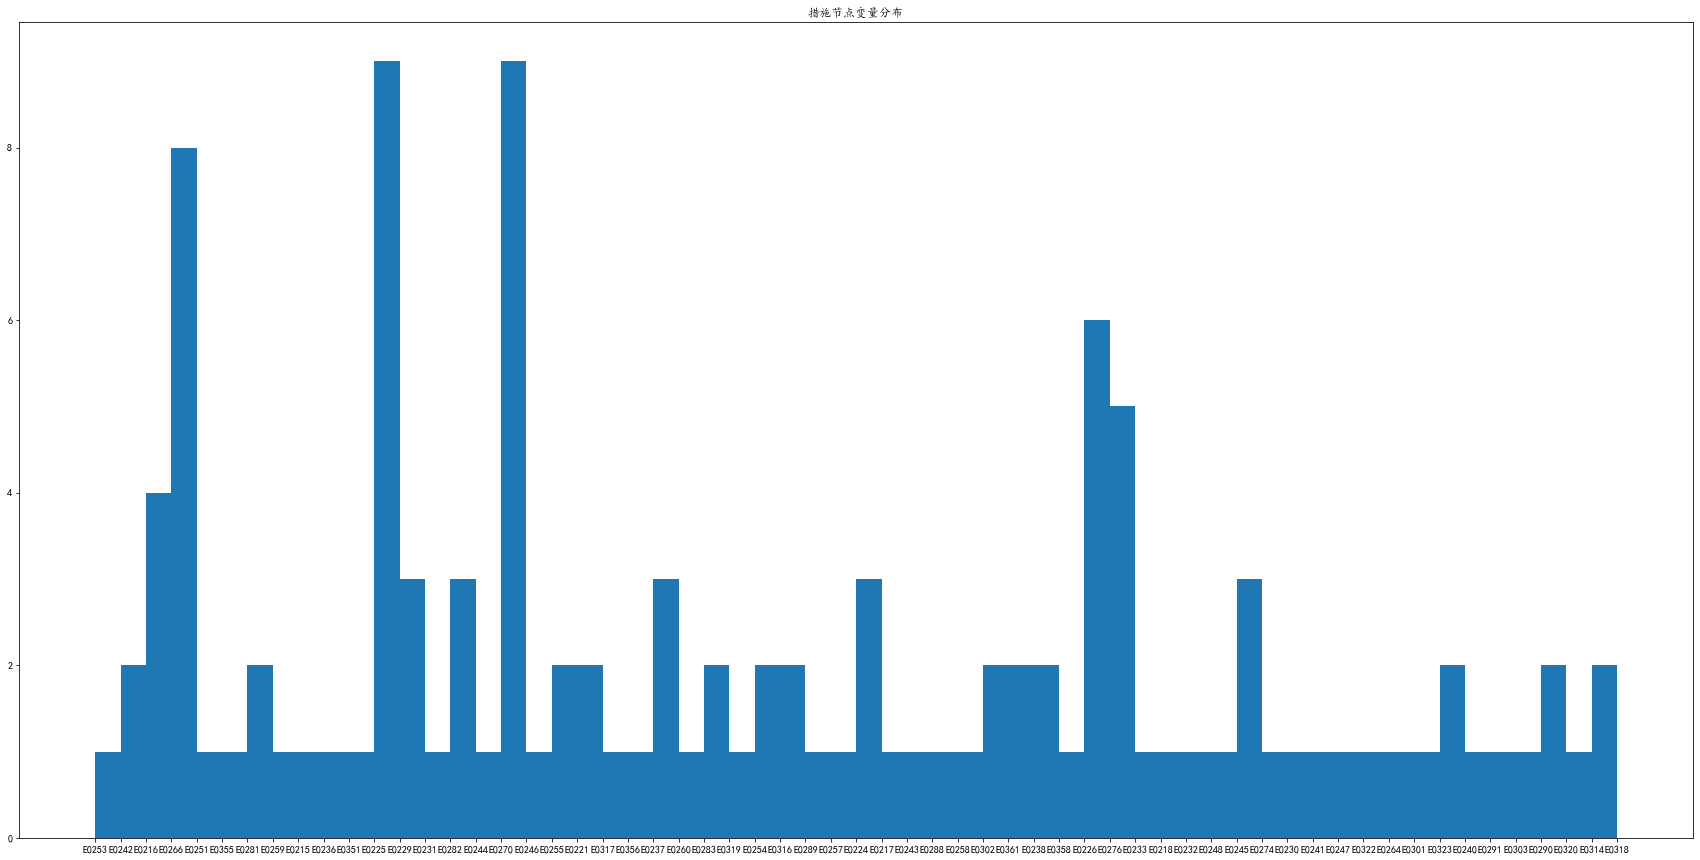

In [21]:
plt.rcParams['figure.figsize']=(30.0,15.0)
plt.title('措施节点变量分布')
plt.hist(D['Target'],bins=state_names['Target'])
plt.savefig(PATH+'Target_hist.png',dpi=300,bbox_inches='tight')
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
test=pd.read_csv(PATH+'predict_results\\test.csv')

In [15]:
y1=test.iloc[0,:].values[1:].tolist()
y2=test.iloc[1,:].values[1:].tolist()
x=[1,2,3,4,5]

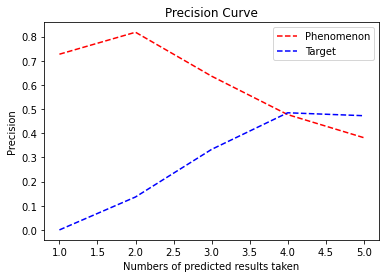

In [19]:
l1=plt.plot(x,y1,'r--',label='Phenomenon')
l1=plt.plot(x,y2,'b--',label='Target')
plt.title('Precision Curve')
plt.xlabel('Numbers of predicted results taken')
plt.ylabel('Precision')
plt.legend()
plt.savefig('possibility_curve.png',dpi=300)
plt.show()